In [1]:
from services.load_dataset import load_data
import pickle

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

best_hp = pickle.load(open('model/best_hp.pkl', 'rb'))
best_hp = best_hp.values

In [2]:
from services.dp_modeling import train_model_with_delta

best_hp['num_microbatches'] = 1
best_hp['l2_norm_clip'] = 1.0

delta_values = [1e-6*10**(-i) for i in range(5)]
results = {}

for delta in delta_values:
    results[delta] = train_model_with_delta(delta, X_train, y_train, X_val, y_val, best_hp, target_epsilon=1.0, epochs=50, batch_size=32)




δ=1.0e-06: Using noise_multiplier=32.025 (Achieved ε=1.00)

Epoch 1/50

6104/6104 [==============================] - 96s 11ms/step - loss: 0.1721 - accuracy: 0.5237 - precision: 0.2473 - recall: 0.6762 - auc: 0.6338 - val_loss: 0.1753 - val_accuracy: 0.4415 - val_precision: 0.0053 - val_recall: 0.7853 - val_auc: 0.7288
Epoch 2/50
6104/6104 [==============================] - 65s 11ms/step - loss: 0.1720 - accuracy: 0.5234 - precision: 0.2471 - recall: 0.6758 - auc: 0.6330 - val_loss: 0.1753 - val_accuracy: 0.4423 - val_precision: 0.0053 - val_recall: 0.7853 - val_auc: 0.7286
Epoch 3/50
6104/6104 [==============================] - 66s 11ms/step - loss: 0.1721 - accuracy: 0.5222 - precision: 0.2463 - recall: 0.6741 - auc: 0.6326 - val_loss: 0.1753 - val_accuracy: 0.4412 - val_precision: 0.0053 - val_recall: 0.7853 - val_auc: 0.7303
Epoch 4/50
6104/6104 [==============================] - 68s 11ms/step - loss: 0.1720 - accuracy: 0.5248 - precision: 0.2484 - recall: 0.6793 - auc: 0.6355 -

KeyboardInterrupt: 

In [ ]:
from services.modeling import create_sequences

X_train_seq, y_train_seq = create_sequences(X_train, y_train, best_hp['sequence_length'])
X_test_seq, y_test_seq = create_sequences(X_test, y_test, best_hp['sequence_length'])

Epsilon = 1.001, Delta = 1e-06


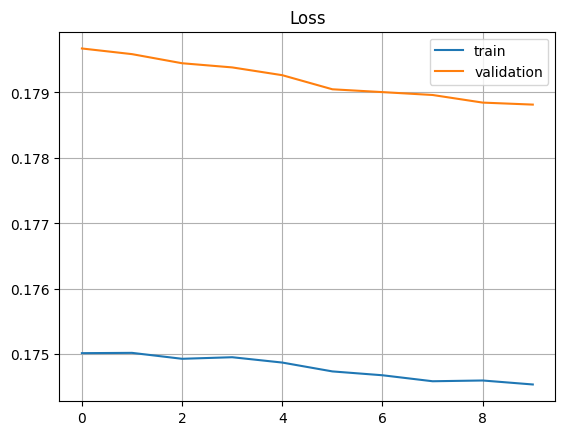

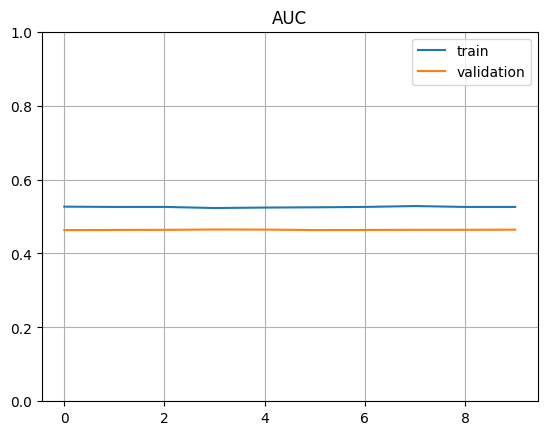

Epsilon = 1.001, Delta = 1e-07


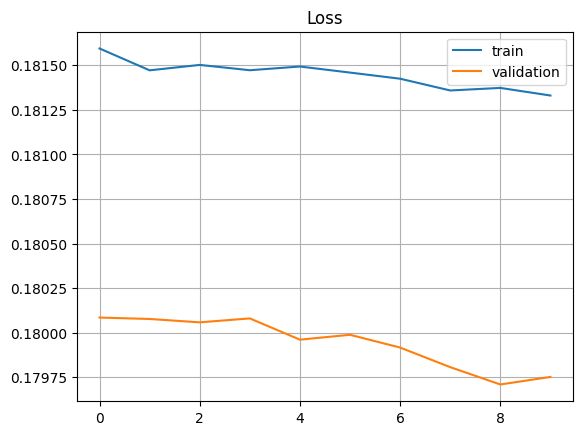

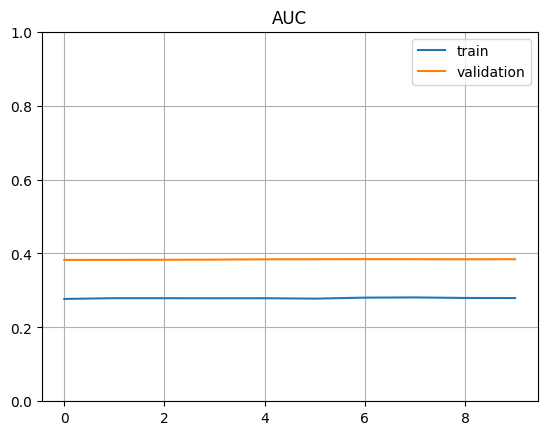

Epsilon = 1.001, Delta = 1e-08


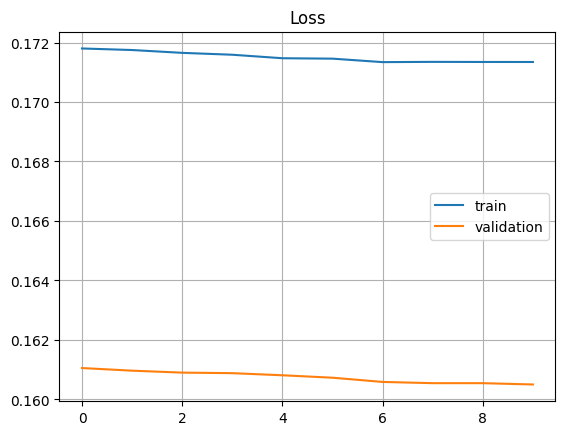

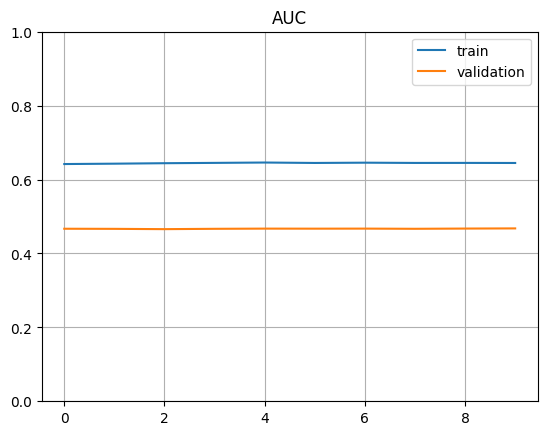

Epsilon = 1.001, Delta = 1e-09


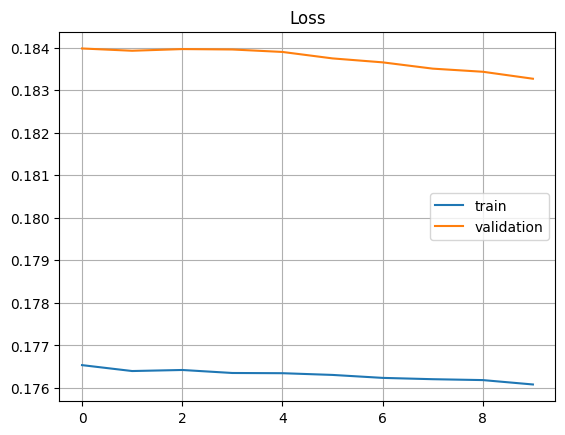

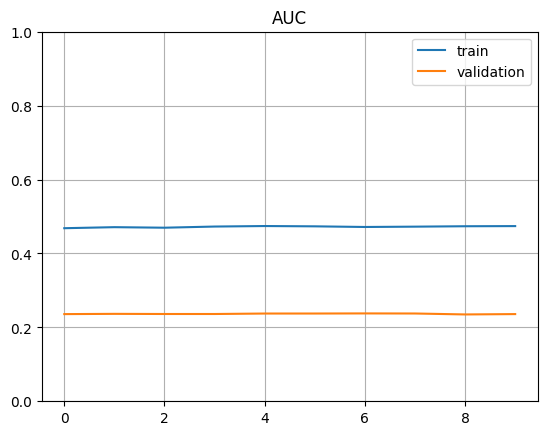

Epsilon = 1.001, Delta = 1e-10


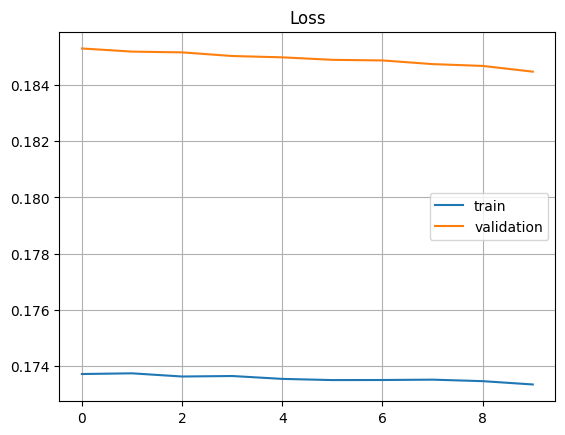

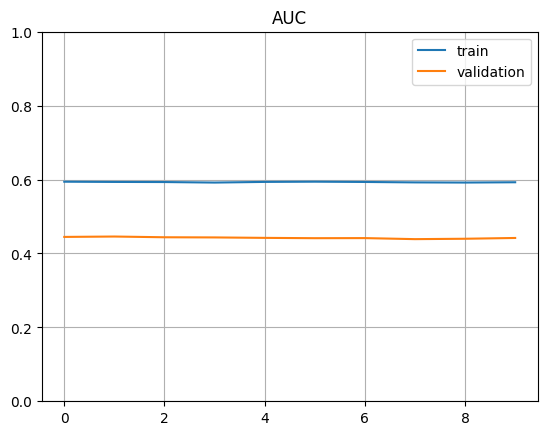

Epsilon = 1.001, Delta = 1.0000000000000001e-11


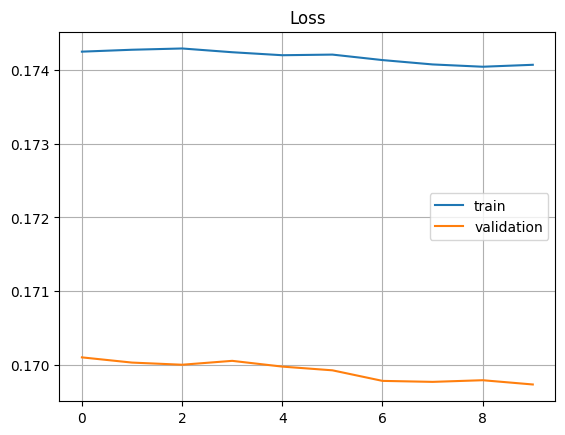

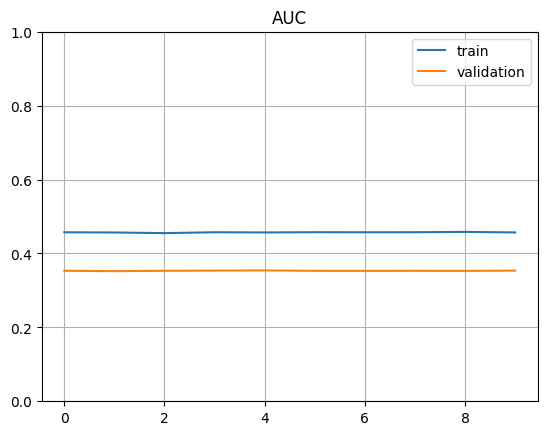

Epsilon = 1.001, Delta = 1e-12


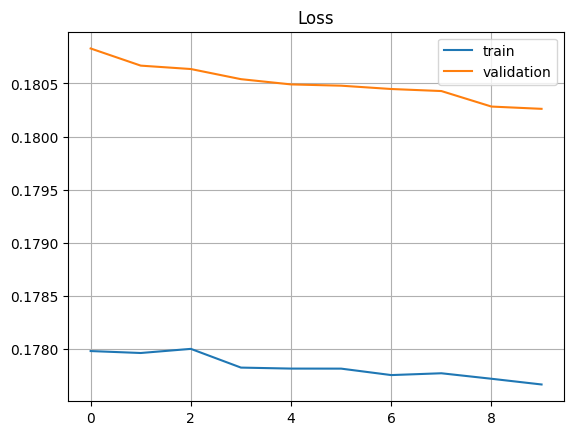

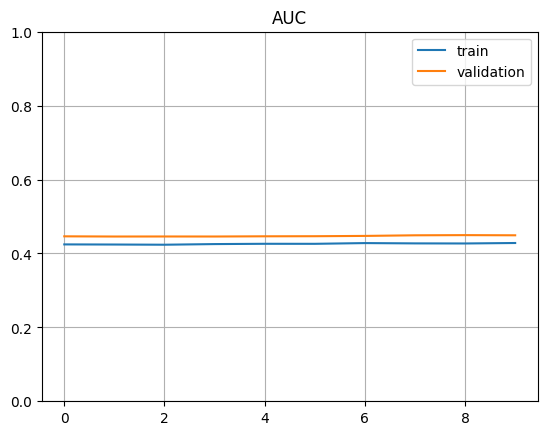

In [ ]:
from services.eval_privacy import compute_mia_attacks
import matplotlib.pyplot as plt

attacks_results_list = []
figure_list = []
for delta, result in results.items():
    model = result['model']
    history = result['history']

    print(f"Epsilon = {result['epsilon']}, Delta = {delta}")
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(history.history['auc'], label='train')
    plt.plot(history.history['val_auc'], label='validation')
    plt.title('AUC')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(history.history['precision'], label='train')
    plt.plot(history.history['val_precision'], label='validation')
    plt.title('Precision')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(history.history['recall'], label='train')
    plt.plot(history.history['val_recall'], label='validation')
    plt.title('Recall')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

    attacks_result, figure = compute_mia_attacks(model, X_train_seq[:X_test_seq.shape[0]], X_test_seq, y_train_seq[:X_test_seq.shape[0]], y_test_seq)
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)